In [95]:
import pandas as pd
import numpy as np
import datetime as dt

In [96]:
df = pd.read_csv('DataVizData.csv')

In [97]:
df['date'] = pd.to_datetime(df['time'],unit='s')

In [98]:
df['date']

0       2022-11-01 01:00:23
1       2022-10-31 22:29:35
2       2022-10-31 22:11:59
3       2022-10-31 17:57:11
4       2022-10-31 14:33:47
                ...        
28666   2021-05-01 05:51:32
28667   2021-05-01 05:51:32
28668   2021-05-01 05:50:09
28669   2021-05-01 05:15:48
28670   2021-04-30 17:38:59
Name: date, Length: 28671, dtype: datetime64[ns]

In [99]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [100]:
df['month_year'] = df.apply(lambda row: str(row['month']) + '/' + str(row['year']), axis=1)

In [101]:
df['month_year']

0        11/2022
1        10/2022
2        10/2022
3        10/2022
4        10/2022
          ...   
28666     5/2021
28667     5/2021
28668     5/2021
28669     5/2021
28670     4/2021
Name: month_year, Length: 28671, dtype: object

In [102]:
month_year_aggregation = df.groupby('month_year')['usd_value'].sum().reset_index()

In [103]:
month_year_aggregation['month_year']= month_year_aggregation['month_year'].apply(lambda x: pd.to_datetime(x))

In [104]:
month_year_aggregation = month_year_aggregation.sort_values(by='month_year')

In [105]:
month_year_aggregation = month_year_aggregation[month_year_aggregation['month_year'] != '2021-04-01']
month_year_aggregation = month_year_aggregation[month_year_aggregation['month_year'] != '2022-11-01']

In [106]:
month_year_aggregation

,month_year,usd_value
10,2021-05-01,16290628.900
12,2021-06-01,44436887.680
14,2021-07-01,37557357.060
16,2021-08-01,293523102.470
18,2021-09-01,130209588.240
1,2021-10-01,95157373.260
3,2021-11-01,198791163.580
5,2021-12-01,146671532.660
0,2022-01-01,318399294.780
6,2022-02-01,120768236.180


In [107]:
month_year_aggregation['month_year'] = month_year_aggregation['month_year'].apply(lambda x: pd.to_datetime(x, format='%b/%Y'))

In [108]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
month_year_aggregation

,month_year,usd_value
10,2021-05-01,16290628.900
12,2021-06-01,44436887.680
14,2021-07-01,37557357.060
16,2021-08-01,293523102.470
18,2021-09-01,130209588.240
1,2021-10-01,95157373.260
3,2021-11-01,198791163.580
5,2021-12-01,146671532.660
0,2022-01-01,318399294.780
6,2022-02-01,120768236.180


In [109]:
month_year_aggregation['size'] = month_year_aggregation['usd_value'].apply(lambda x: round(x / 1000000, 1))

In [110]:
import matplotlib.pyplot as plt

In [111]:
list(month_year_aggregation['size'])

[16.3,
 44.4,
 37.6,
 293.5,
 130.2,
 95.2,
 198.8,
 146.7,
 318.4,
 120.8,
 242.1,
 225.4,
 210.8,
 70.9,
 41.6,
 48.2,
 27.0,
 24.7]

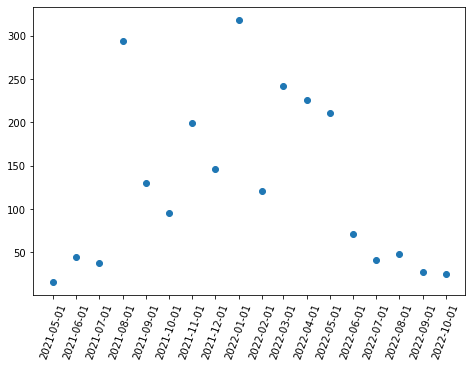

In [112]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(month_year_aggregation['month_year'],list(month_year_aggregation['size']))
plt.xticks(month_year_aggregation['month_year'], rotation=70)
plt.show()

In [113]:
month_year_aggregation[['month_year','size']].to_csv('sales_volume.csv',index=False)